In [1]:
import matplotlib.pyplot as plt
import numpy as np

from graph_lib.spatial_graph import InterpolatingKSRG, LongRangePercolation, SpatialGraph, VertexSet

(-2.203265533553484, 46.92637340334679, -2.208721240903266, 46.95871549831164)

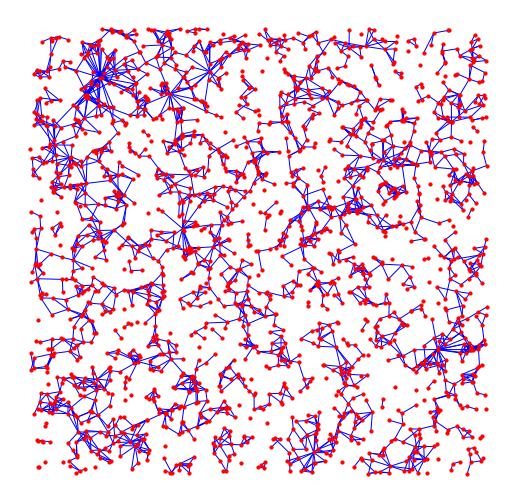

In [2]:
# Generate vertex set either on grid or from PPP (comment other one out)

vertex_set = VertexSet.from_poisson_point_process(number_of_vertices=2000, 
                                                  dimension=2, 
                                                  add_origin=True)
# vertex_set = VertexSet.on_grid(width=45,
#                                dimension=2,
#                                centre_first=True)

# Simulate longrange percolation or Interpolating KSRG (comment other one out)
graph = InterpolatingKSRG(vertex_set, 
                          alpha=5, 
                          tau=4.3, 
                          sigma=0, 
                          c1=0.5, 
                          c2=1.2, 
                          on_torus=False)

# graph = LongRangePercolation(vertex_set, 
#                              alpha=1.8, 
#                              c1=0.25, 
#                              c2=0.8, 
#                              on_torus=False)

# Sample graph. Comment out if you want nearest-neighbor percolation.
graph.sample_graph()


# Nearest neighbor percolation on grid (comment out if you don't want to simulate it)
# graph = SpatialGraph.make_grid_graph(dimension=2, 
#                                      width=41).edge_percolated_graph(0.51)



plt.figure(figsize=(9, 9))
# graph.draw(highlight_component_vertex=graph.centre_vertex_index)
graph.draw(node_color="r")
plt.axis('off')
# plt.savefig("sgm.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)

In [3]:
g = graph.to_networkx_graph()

In [4]:
import networkx as nx


In [5]:
print([len(c) for c in nx.connected_components(g) if 0 in c][0], sorted([len(c) for c in nx.connected_components(g)])[-2:])

1627 [101, 1627]


In [ ]:
# Save a nice fig to file. Change the name yourself. Increase quality by increasing dpi.
plt.savefig("<name-of-file>.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)

In [35]:
def draw(graph, node_size=10, pos=None, highlight_component_vertex=None):
    graph_nx = graph.to_networkx_graph(centre_vertex=highlight_component_vertex)
    if pos is None:
        pos = dict(enumerate(graph.vertex_set.locations.tolist()))
    node_color = 'gray' if highlight_component_vertex is not None else 'r'
    nx.draw_networkx_nodes(graph_nx,
                           pos=pos,
                           node_size=node_size if highlight_component_vertex is None else 5,
                           node_color=node_color)
    nx.draw_networkx_edges(graph_nx, pos=pos, edge_color='gray')
    connected_components = list(nx.components.connected_components(graph_nx))
    component_sizes = sorted([len(cc) for cc in connected_components])
    largest_component = [cc for cc in connected_components if len(cc)==component_sizes[-1]][0]
    second_largest_component = [cc for cc in connected_components if len(cc)==component_sizes[-2]][0]
    connected_component0 = [cc for cc in nx.components.connected_components(graph_nx) 
                           if highlight_component_vertex in cc][0]
    subgraph0 = graph_nx.subgraph(connected_component0)
    subgraph_largest = graph_nx.subgraph(largest_component)
    subgraph2nd = graph_nx.subgraph(second_largest_component)
    
    nx.draw_networkx_nodes(subgraph0, 
                           pos=pos, 
                           nodelist=[i for i in connected_component0 if i!=highlight_component_vertex],
                           node_size=5, 
                           node_color='r')
    nx.draw_networkx_nodes(subgraph0, 
                           pos=pos, 
                           nodelist=[highlight_component_vertex],
                           node_size=40, 
                           node_color='r')
    nx.draw_networkx_edges(subgraph0, pos=pos, edge_color='r')
    nx.draw_networkx_nodes(subgraph_largest, pos=pos, nodelist=largest_component, node_size=5, node_color='b')
    nx.draw_networkx_edges(subgraph_largest, pos=pos, edge_color="b")
#     nx.draw_networkx_nodes(subgraph2nd, pos=pos, nodelist=second_largest_component, node_size=5, node_color='r')
#     nx.draw_networkx_edges(subgraph2nd, pos=pos, edge_color="r")

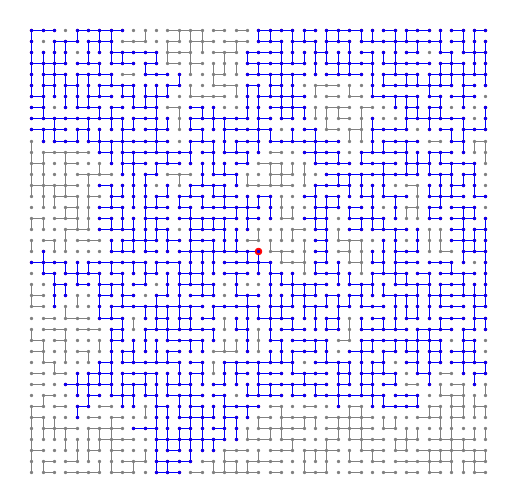

In [49]:
#Nearest neighbor percolation on grid (comment out if you don't want to simulate it)
graph = SpatialGraph.make_grid_graph(dimension=2, 
                                     width=41).edge_percolated_graph(0.51)

plt.figure(figsize=(9, 9))
draw(graph, highlight_component_vertex=graph.centre_vertex_index)
plt.axis('off')
plt.savefig("visualize_nnp_in_giant.jpg", bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

In [45]:
plt.savefig("visualize_nnp_out_giant.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)

<Figure size 432x288 with 0 Axes>

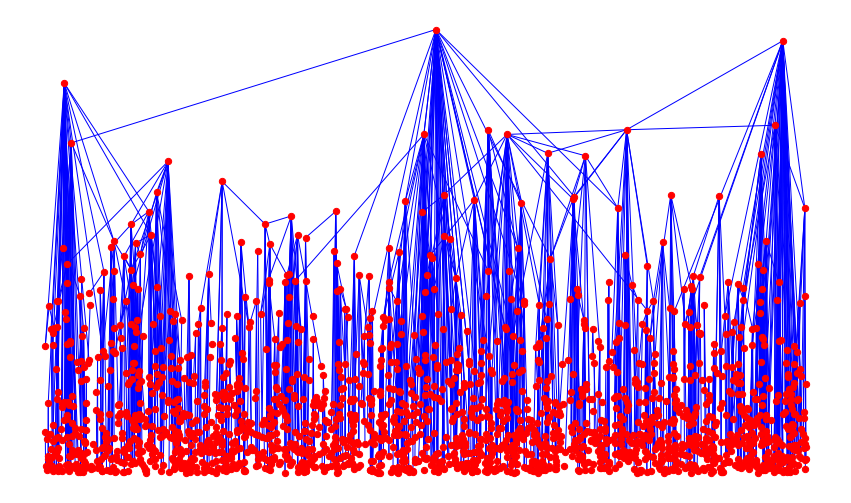

In [4]:
# Simulate one-dimensional interpolating KSRG and make fig with log of weights on y-axis

vertex_set = VertexSet.from_poisson_point_process(number_of_vertices=2000, 
                                                  dimension=1, 
                                                  add_origin=True)
# vertex_set = VertexSet.on_grid(width=2000,
#                                dimension=1,
#                                centre_first=True)


graph = InterpolatingKSRG(vertex_set, 
                          alpha=4, 
                          tau=2.8, 
                          sigma=1, 
                          c1=0.25, 
                          c2=0.25, 
                          on_torus=False)
graph.sample_graph()

plt.figure(figsize=(15,9))
graph.draw_1d()
plt.axis('off')
plt.savefig("visualize_adrcm_1d_1.png", bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

In [ ]:
graph_empty = InterpolatingKSRG(vertex_set, 
                                alpha=4, 
                                tau=2.8, 
                                sigma=1, 
                                c1=0.25, 
                                c2=0.25, 
                                on_torus=False)

plt.figure(figsize=(15,9))
graph_empty.draw_1d(accept_empty=True)
plt.axis('off')
plt.savefig("visualize_1d_0.png", bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

In [ ]:
from scipy.sparse import csr_matrix

m = csr_matrix((5,5))


In [ ]:
m.toarray()

In [ ]:
# Save a nice fig to file. Change the name yourself. Increase quality by increasing dpi.
plt.savefig("<name-of-file>.png", bbox_inches='tight', pad_inches=0, transparent=False, dpi=300)